# Setup

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import load
from sklearn.preprocessing import StandardScaler

In [2]:
X_test = np.load('../data/X_test.npy')
X_test_all_indices = np.load('../data/X_test_all_indices.npy')
X_test_selected_indices = np.load('../data/X_test_selected_indices.npy')
y_test = np.load('../data/y_test.npy')

scaler_test = StandardScaler()
X_test_scaled = scaler_test.fit_transform(X_test)
scaler_test_all_indices = StandardScaler()
X_test_all_indices_scaled = scaler_test_all_indices.fit_transform(X_test_all_indices)
scaler_test_selected_indices = StandardScaler()
X_test_selected_indices_scaled = scaler_test_selected_indices.fit_transform(X_test_selected_indices)

In [3]:
linear_regression_10_bands = load('../models/linear_regression_10_bands.joblib')
linear_regression_all_bands = load('../models/linear_regression_all_bands.joblib')
linear_regression_selected_bands = load('../models/linear_regression_selected_bands.joblib')
knn_10_bands = load('../models/knn_10_bands.joblib')
knn_all_bands = load('../models/knn_all_bands.joblib')
knn_selected_bands = load('../models/knn_selected_bands.joblib')
decision_tree_10_bands = load('../models/decision_tree_10_bands.joblib')
decision_tree_all_bands = load('../models/decision_tree_all_bands.joblib')
decision_tree_selected_bands = load('../models/decision_tree_selected_bands.joblib')
random_forest = load('../models/random_forest.joblib')
extra_trees = load('../models/extra_trees.joblib')
xgboost = load('../models/xgboost.joblib')
# mlp = load('../models/mlp.joblib') # TODO!
# cnn = load('../models/cnn.joblib') # TODO!

# Compute Statistics on the Predictions

In [12]:
y_pred_linear_regression_10_bands = linear_regression_10_bands.predict(X_test)
y_pred_linear_regreesion_all_bands = linear_regression_all_bands.predict(X_test_all_indices)
y_pred_linear_regression_selected_bands = linear_regression_selected_bands.predict(X_test_selected_indices)
y_pred_knn_10_bands = knn_10_bands.predict(X_test_scaled)
y_pred_knn_all_bands = knn_all_bands.predict(X_test_all_indices_scaled)
y_pred_knn_selected_bands = knn_selected_bands.predict(X_test_selected_indices_scaled)
y_pred_decision_tree_10_bands = decision_tree_10_bands.predict(X_test)
y_pred_decision_tree_all_bands = decision_tree_all_bands.predict(X_test_all_indices)
y_pred_decision_tree_selected_bands = decision_tree_selected_bands.predict(X_test_selected_indices)
y_pred_random_forest = random_forest.predict(X_test_all_indices)
y_pred_extra_trees = extra_trees.predict(X_test_all_indices)
y_pred_xgboost = xgboost.predict(X_test_all_indices)

In [13]:
predictions = {
    'Linear Regression (10 bands)': y_pred_linear_regression_10_bands,
    'Linear Regression (all bands)': y_pred_linear_regreesion_all_bands,
    'Linear Regression (selected bands)': y_pred_linear_regression_selected_bands,
    'KNN (10 bands)': y_pred_knn_10_bands,
    'KNN (all bands)': y_pred_knn_all_bands,
    'KNN (selected bands)': y_pred_knn_selected_bands,
    'Decision Tree (10 bands)': y_pred_decision_tree_10_bands,
    'Decision Tree (all bands)': y_pred_decision_tree_all_bands,
    'Decision Tree (selected bands)': y_pred_decision_tree_selected_bands,
    'Random Forest': y_pred_random_forest,
    'Extra Trees': y_pred_extra_trees,
    'XGBoost': y_pred_xgboost
}

# Convert to DataFrame
df_predictions = pd.DataFrame(predictions)

# Get descriptive statistics
df_predictions.describe()

,Linear Regression (10 bands),Linear Regression (all bands),Linear Regression (selected bands),KNN (10 bands),KNN (all bands),KNN (selected bands),Decision Tree (10 bands),Decision Tree (all bands),Decision Tree (selected bands),Random Forest,Extra Trees,XGBoost
count,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000
mean,12.017736,11.940293,12.034005,11.929587,11.856958,11.871426,11.927531,11.903911,11.950075,11.986535,11.984655,10.996716
std,7.076760,7.981692,7.450380,8.644216,8.574779,8.575477,8.443996,8.494261,8.473339,8.391287,8.399712,9.375118
min,-35.435592,-3.574576,-27.682202,2.405151,2.418720,2.410934,2.477975,2.440444,2.444000,2.418953,2.408615,1.967073
25%,6.690026,5.072842,6.225745,4.199607,4.191805,4.277535,4.145105,4.160949,4.277101,4.414889,4.385104,3.022045
50%,11.791601,9.221716,10.964180,7.655749,7.520085,7.576399,7.555329,6.976207,7.605893,8.144412,8.198507,5.161296
75%,18.273766,19.107416,18.467993,20.426891,20.175946,20.245969,21.013082,20.150028,19.898850,20.038869,20.185847,20.723217
max,26.152177,35.568918,29.357613,31.603111,30.688893,32.321597,36.097000,35.278000,33.633611,33.054828,33.299544,30.829103


# Visualization of True Labels vs. Predictions

TODO: Visualize CDF Predictions vs. Labels

## Linear Regression

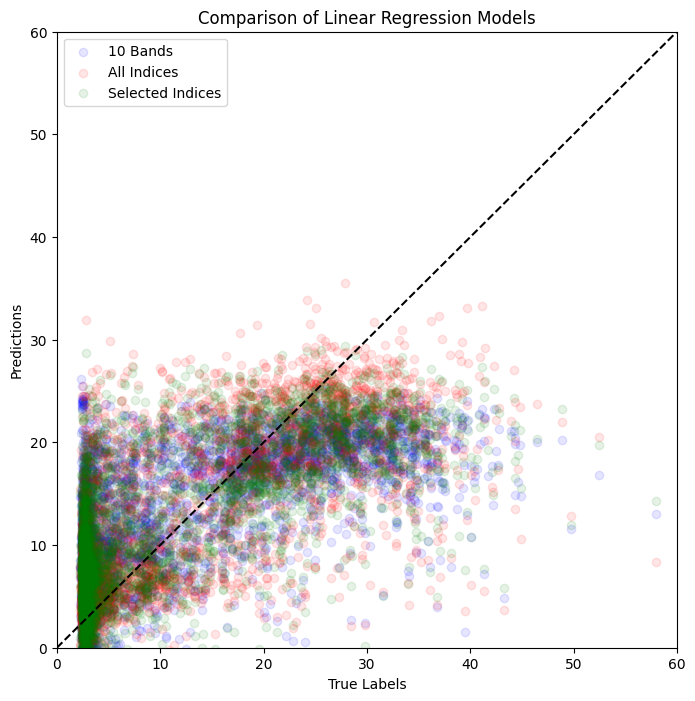

In [6]:
fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_linear_regression_10_bands, color="blue", alpha=0.1, label="10 Bands")
plt.scatter(y_test, y_pred_linear_regreesion_all_bands, color="red", alpha=0.1, label="All Indices")
plt.scatter(y_test, y_pred_linear_regression_selected_bands, color="green", alpha=0.1, label="Selected Indices")
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("Comparison of Linear Regression Models")
plt.legend()

plt.show()

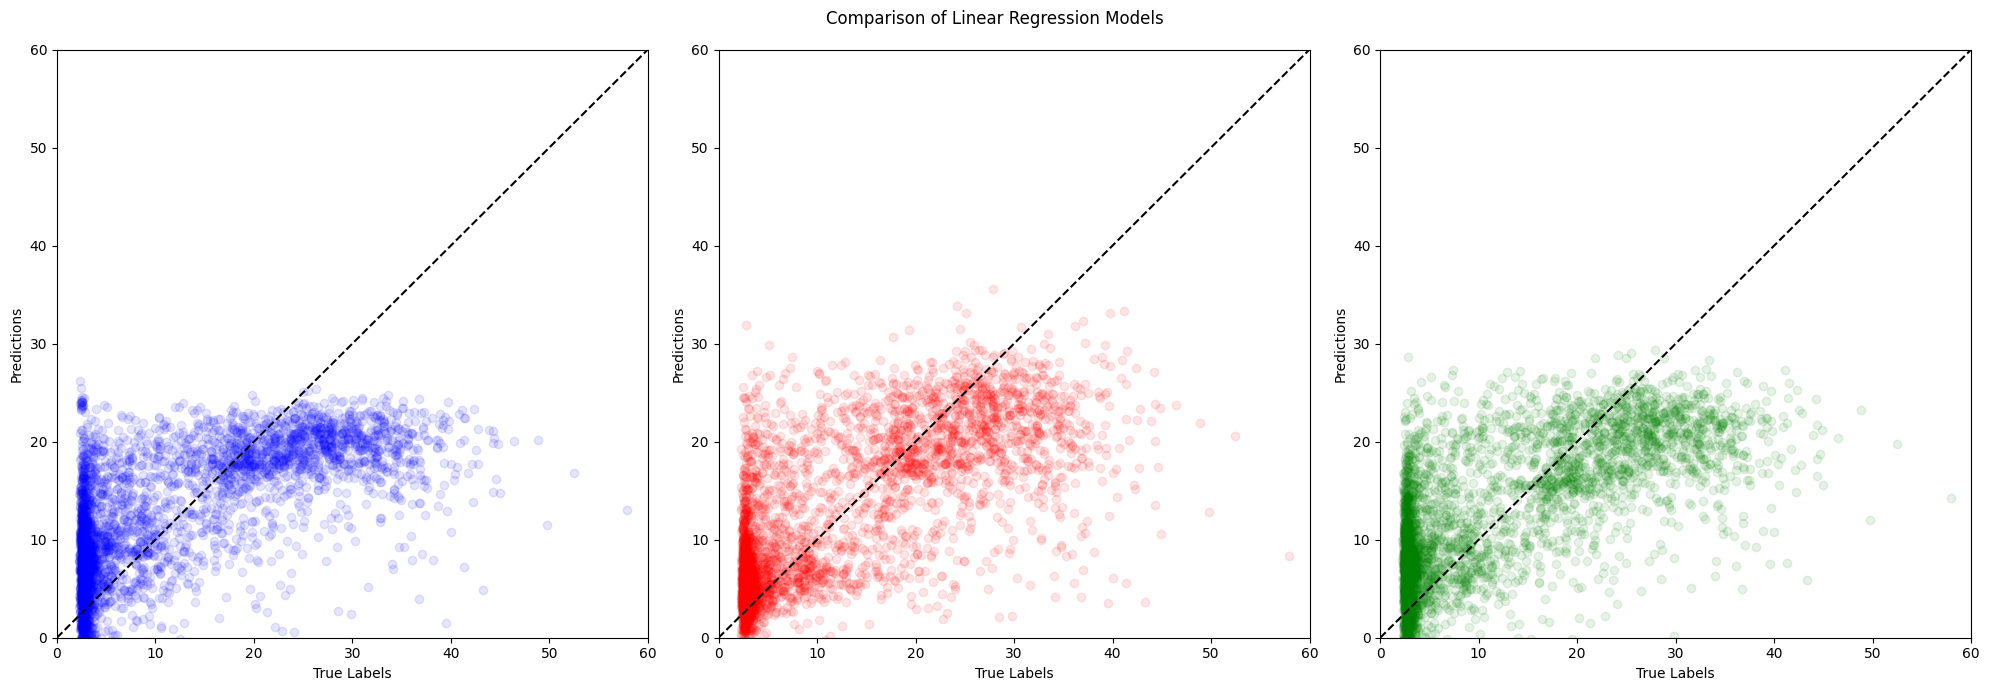

In [15]:
# Create a figure and specify the layout to have 1 row and 2 columns
fig = plt.figure(figsize=(20, 7))

plt.subplot(1, 3, 1)  # Arguments are: nrows, ncols, index
plt.scatter(y_test, y_pred_linear_regression_10_bands, color="blue", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_linear_regreesion_all_bands, color="red", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_linear_regression_selected_bands, color="green", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")

plt.suptitle("Comparison of Linear Regression Models")
plt.tight_layout()
plt.show()

## KNN

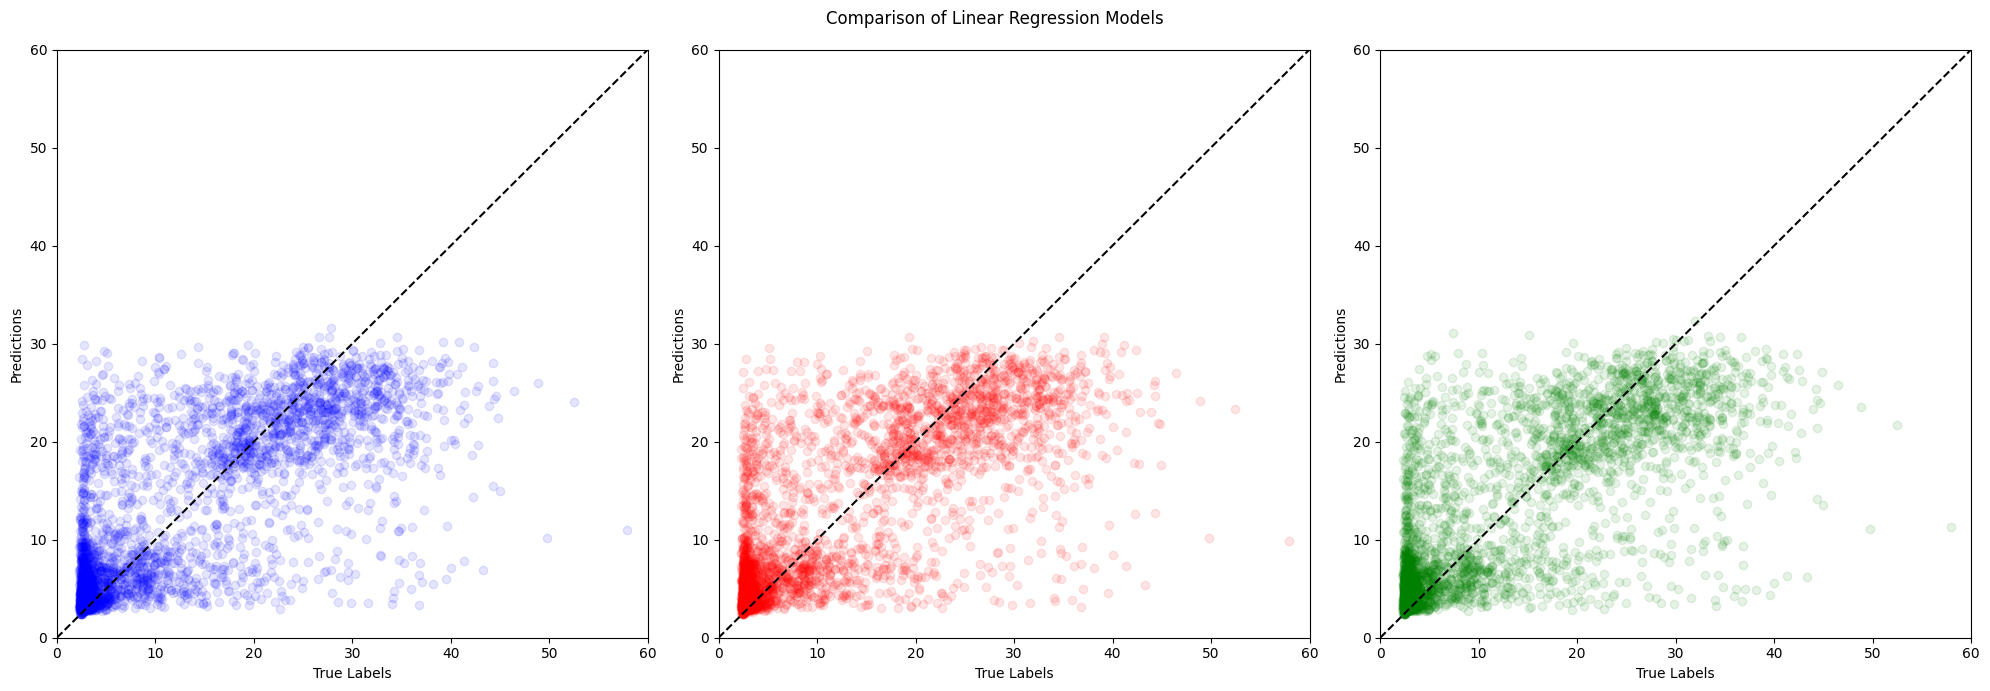

In [16]:
# Create a figure and specify the layout to have 1 row and 2 columns
fig = plt.figure(figsize=(20, 7))

plt.subplot(1, 3, 1)  # Arguments are: nrows, ncols, index
plt.scatter(y_test, y_pred_knn_10_bands, color="blue", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_knn_all_bands, color="red", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_knn_selected_bands, color="green", alpha=0.1)
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")

plt.suptitle("Comparison of Linear Regression Models")
plt.tight_layout()
plt.show()

# DT

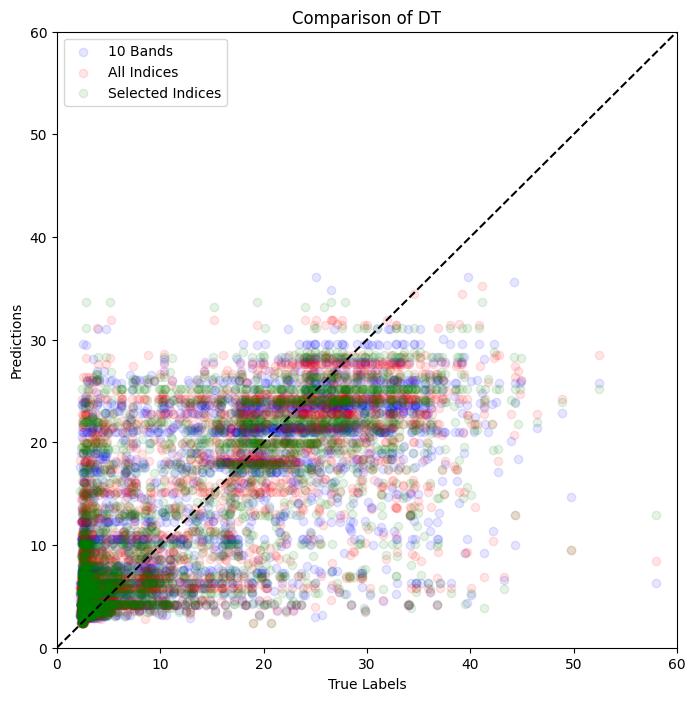

In [17]:
fig = plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred_decision_tree_10_bands, color="blue", alpha=0.1, label="10 Bands")
plt.scatter(y_test, y_pred_decision_tree_all_bands, color="red", alpha=0.1, label="All Indices")
plt.scatter(y_test, y_pred_decision_tree_selected_bands, color="green", alpha=0.1, label="Selected Indices")
plt.plot([0, 60], [0, 60], color='black', linestyle='--')
plt.ylim([0, 60])
plt.xlim([0, 60])
plt.xlabel("True Labels")
plt.ylabel("Predictions")
plt.title("Comparison of DT")
plt.legend()

plt.show()